In [25]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [26]:
#Read file
df = pd.read_csv('Iowa_Liquor_Sales.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
pd.options.display.max_columns = None
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,NaN,NaN,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,NaN,NaN,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,NaN,NaN,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,NaN,NaN,65.0,Jim Beam Brands,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,NaN,NaN,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [28]:
df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [29]:
#Filling of null values
df = df.fillna(0)
df = df.drop_duplicates(subset=['Invoice/Item Number'])
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,0.0,0,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,0.0,0,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,0.0,0,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,0.0,0,65.0,Jim Beam Brands,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,0.0,0,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [30]:
#Transformation of State Bottle Cost, State Bottle Retail, Sale (Dollars) to float values
df['State Bottle Cost'] = df['State Bottle Cost'].str.extract(r'([^$]+)')
df['State Bottle Retail'] = df['State Bottle Retail'].str.extract(r'([^$]+)')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.extract(r'([^$]+)')

In [31]:
#Conversion of columns to appropriate data type
c_df = {'Invoice/Item Number': str,
       'Store Number': int,
       'Store Name': str,
       'Address': str,
       'City': str,
       'Zip Code': str,
       'Store Location': str,
       'County Number': int,
       'Category': int,
       'Category Name': str,
       'Vendor Number': int,
       'Vendor Name': str,
       'Item Number': int,
       'Item Description': str,
       'Pack': int,
       'Bottle Volume (ml)': int,
       'State Bottle Cost': float,
       'State Bottle Retail': float,
       'Bottles Sold': int,
       'Sale (Dollars)': float,
       'Volume Sold (Liters)': float,
       'Volume Sold (Gallons)': float}
df = df.astype(c_df)
df['Date'] = pd.to_datetime(df['Date'])
del c_df

In [32]:
#Data Visualization
YearSold = df
YearSold['Year'] = df['Date'].values.astype('datetime64[Y]')
YearSold = YearSold.groupby(['Year'])[['Bottle Volume (ml)', 'State Bottle Cost','State Bottle Retail',
                  'Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)']].agg('sum').reset_index()
YearSold

,Year,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2012-01-01,1963983653,19080160.18,28701907.67,19917404,2.552033e+08,18755279.42,4954851.80
1,2013-01-01,1928198628,19367992.01,29126156.34,19934692,2.581038e+08,18576450.22,4907690.85
2,2014-01-01,1952962308,20163092.36,30303011.56,20666259,2.705877e+08,19157612.51,5061262.51
3,2015-01-01,2020242802,21443952.50,32204501.74,21572443,2.843286e+08,19617702.47,5182900.41
4,2016-01-01,2104248471,22756747.58,34156871.14,16191730,2.515319e+08,14508093.43,3828342.03
5,2017-01-01,1726721483,18806568.62,28220772.20,4213769,1.482597e+08,3680936.84,962016.36


In [33]:
#Conversion to Millions
YearSold['Bottles Sold (Millions)'] = YearSold['Bottles Sold'].div(1000000)
YearSold['Sale (Millions)'] = YearSold['Sale (Dollars)'].div(1000000)
YearSold.drop(columns=['Bottles Sold'], inplace = True)
YearSold.drop(columns=['Sale (Dollars)'], inplace = True)

In [34]:
def createLinePlt(data, x, y, title = None, xlabel = None, ylabel = None, figsize=(10,5), xrotation=0, savename = 'default'):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(data[x], data[y], marker='o', markersize = 4)
    ax.set_title(title)
    plt.xticks(rotation=xrotation)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True)
    plt.savefig(f'{savename}.jpg', dpi=300)
    plt.show()

# Bottles Sold Per Year

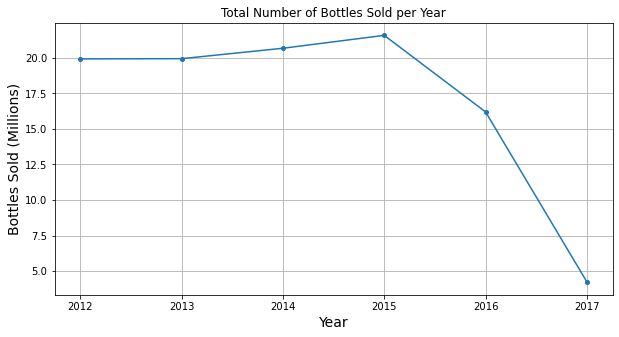

In [35]:
createLinePlt(YearSold, 'Year', 'Bottles Sold (Millions)', title='Total Number of Bottles Sold per Year',
          xlabel = 'Year', ylabel = 'Bottles Sold (Millions)', savename='Images\\BottlesSoldPerYear')

# Total Sales per Year

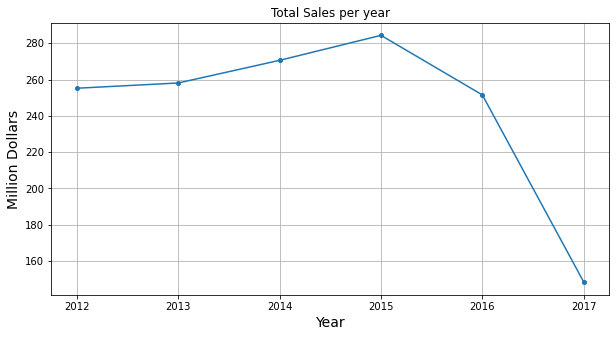

In [36]:
createLinePlt(YearSold, 'Year', 'Sale (Millions)', title='Total Sales per year',
          xlabel = 'Year', ylabel = 'Million Dollars', savename='Images\\TotalSalesPerYear')

# Total Sales per Month

This part shows the total sales of a single month from 2012-2017, it does not show the total sales per month per year

In [37]:
MonthSold = df
dateData = pd.DataFrame(df['Date'].dt.strftime('%m:%B'))
dateData = dateData['Date'].str.split(':', n = 1, expand=True)
MonthSold['MonthNum'] = dateData[0]
MonthSold['MonthName'] = dateData[1]
MonthSold = MonthSold.groupby(['MonthNum', 'MonthName'])[['Bottle Volume (ml)', 'State Bottle Cost','State Bottle Retail',
                  'Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)']].agg('sum').reset_index()
del dateData

#Conversion to Millions
MonthSold['Bottles Sold (Millions)'] = MonthSold['Bottles Sold'].div(1000000)
MonthSold['Sale (Millions)'] = MonthSold['Sale (Dollars)'].div(1000000)
MonthSold.drop(columns=['Bottles Sold'], inplace = True)
MonthSold.drop(columns=['Sale (Dollars)'], inplace = True)

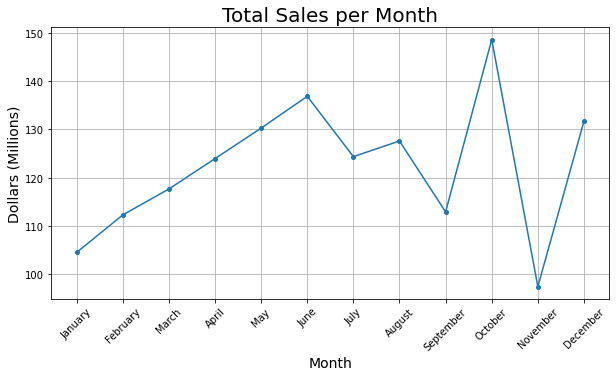

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(MonthSold['MonthNum'], MonthSold['Sale (Millions)'], marker='o', markersize = 4)
ax.set_title('Total Sales per Month', fontsize=20)
plt.xticks(ticks=MonthSold['MonthNum'], labels=MonthSold['MonthName'], rotation=45)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Dollars (Millions)', fontsize=14)
ax.grid(True)
plt.savefig('Images\\TotalSalesMonth.jpg', dpi= 300, bbox_inches = "tight")
plt.show()

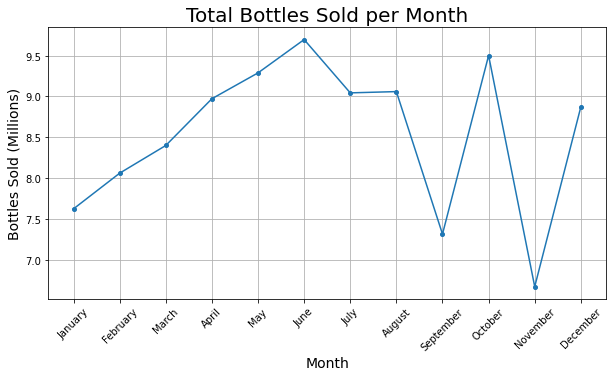

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(MonthSold['MonthNum'], MonthSold['Bottles Sold (Millions)'], marker='o', markersize = 4)
ax.set_title('Total Bottles Sold per Month', fontsize=20)
plt.xticks(ticks=MonthSold['MonthNum'], labels=MonthSold['MonthName'], rotation=45)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Bottles Sold (Millions)', fontsize=14)
ax.grid(True)
plt.savefig('Images\\TotalBottlesMonth.jpg', dpi=300, bbox_inches = "tight")
plt.show()

It appears that there is time specifity in where the numbers of bottles sold is particularly higher compared to the other months

# Most Profitable Establishment

Shows the most profitable establishment from 2012-2017

In [51]:
storeSold = df.groupby(['Store Number', 'Store Name'])[['Bottle Volume (ml)', 
                                                        'State Bottle Cost', 'State Bottle Retail',
                                                        'Bottles Sold','Sale (Dollars)', 'Volume Sold (Liters)',
                                                        'Volume Sold (Gallons)']].agg('sum').reset_index().sort_values(
    ['Sale (Dollars)'], ascending = False)

storeSold['Bottles Sold (Millions)'] = storeSold['Bottles Sold'].div(1000000)
storeSold['Sale (Millions)'] = storeSold['Sale (Dollars)'].div(1000000)
storeSold.drop(columns=['Bottles Sold'], inplace = True)
storeSold.drop(columns=['Sale (Dollars)'], inplace = True)
storeSold

,Store Number,Store Name,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Volume Sold (Liters),Volume Sold (Gallons),Bottles Sold (Millions),Sale (Millions)
143,2633,Hy-Vee #3 / BDI / Des Moines,102988678,1351294.98,2029010.78,2694249.17,711650.75,2.759980,47.301837
1321,4829,Central City 2,82001200,1134103.28,1702344.82,1850515.08,488786.81,1.910141,34.490212
45,2512,Hy-Vee Wine and Spirits / Iowa City,79521135,908816.51,1365461.41,1215560.01,321063.98,1.288319,19.504472
227,3385,Sam's Club 8162 / Cedar Rapids,30024575,336420.18,505098.22,1281324.83,338470.26,1.155985,19.136491
233,3420,Sam's Club 6344 / Windsor Heights,22991325,263577.84,395748.11,1315827.07,347591.01,1.089468,19.102040
...,...,...,...,...,...,...,...,...,...
2013,9932,"3-Oaks Distillery, LLC",750,21.60,32.40,0.75,0.19,0.000001,0.000389
1935,5433,Y-Knot,8600,95.43,143.16,20.10,5.26,0.000021,0.000329
1992,9017,Honey Creek Distillery,750,13.09,19.64,9.00,2.38,0.000012,0.000236
2011,9930,Thome Enterprises LLC,750,8.00,12.00,3.00,0.79,0.000004,0.000144


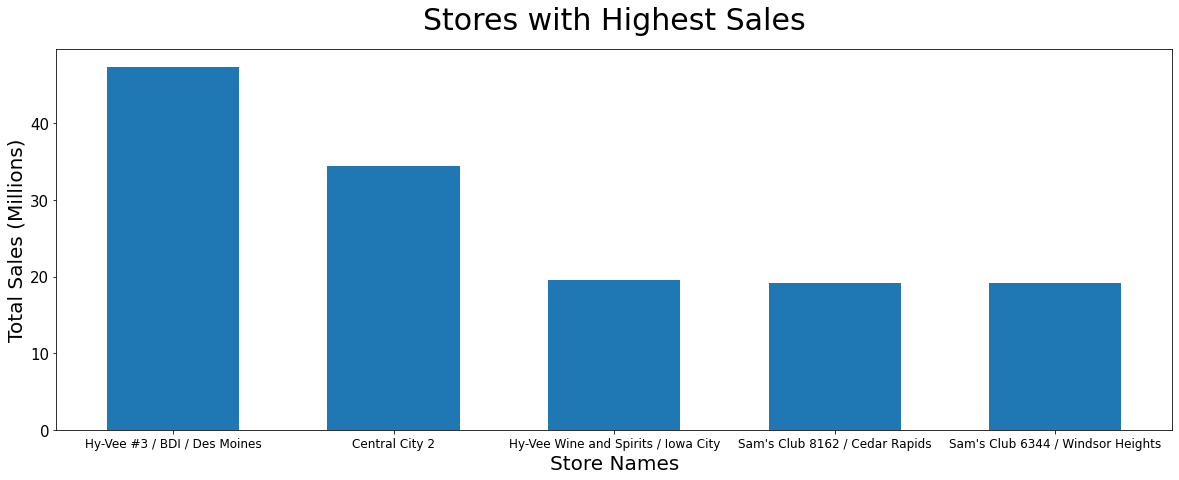

In [41]:
fig, ax = plt.subplots(figsize=(20,7))
plt.bar(storeSold['Store Name'].head(5), storeSold['Sale (Millions)'].head(5), width=0.6)
plt.xlabel('Store Names', fontsize=20)
plt.ylabel('Total Sales (Millions)', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.title('Stores with Highest Sales', fontsize=30, pad=20)
plt.savefig('Images\\StoreHighSales.jpg', dpi=300)
plt.show()

# Most Bought Liquor

In [42]:
liquorSold = df.groupby(['Item Number', 'Item Description'])[['Bottle Volume (ml)', 
                                                        'State Bottle Cost', 'State Bottle Retail',
                                                        'Bottles Sold','Sale (Dollars)', 'Volume Sold (Liters)',
                                                        'Volume Sold (Gallons)']].agg('sum').reset_index().sort_values(
    ['Bottles Sold'], ascending = False)

liquorSold['Bottles Sold (Millions)'] = liquorSold['Bottles Sold'].div(1000000)
liquorSold['Sale (Millions)'] = liquorSold['Sale (Dollars)'].div(1000000)
liquorSold.drop(columns=['Bottles Sold'], inplace = True)
liquorSold.drop(columns=['Sale (Dollars)'], inplace = True)

In [52]:
liquorSold.head()

,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Volume Sold (Liters),Volume Sold (Gallons),Bottles Sold (Millions),Sale (Millions)
622,11788,Black Velvet,224666750,1301325.20,1972207.00,4435097.33,1171426.02,2.534341,38.893489
2399,43337,Captain Morgan Spiced Rum,59874000,696008.22,1044032.94,1619028.00,427641.21,1.619028,29.713224
1693,36308,Hawkeye Vodka,213956750,875403.01,1313715.82,2820219.50,744799.99,1.611554,18.242197
1771,36904,Mccormick Vodka Pet,21841125,104584.88,156663.94,467497.44,123487.97,1.246799,4.064637
1557,35317,Barton Vodka,24467000,97133.99,145710.03,944756.49,249552.41,0.944755,5.774371


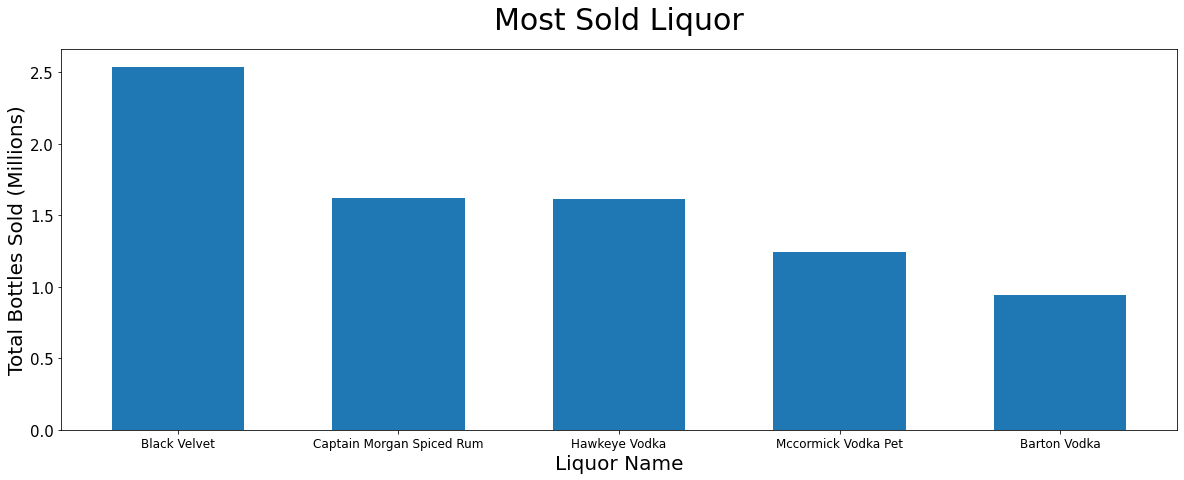

In [43]:
fig, ax = plt.subplots(figsize=(20,7))
plt.bar(liquorSold['Item Description'].head(5), liquorSold['Bottles Sold (Millions)'].head(5), width=0.6)
plt.xlabel('Liquor Name', fontsize=20)
plt.ylabel('Total Bottles Sold (Millions)', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.title('Most Sold Liquor', fontsize=30, pad=20)
plt.savefig('Images\\LiquorMostSold.jpg', dpi=300)
plt.show()

# Liquor with Highest Revenue

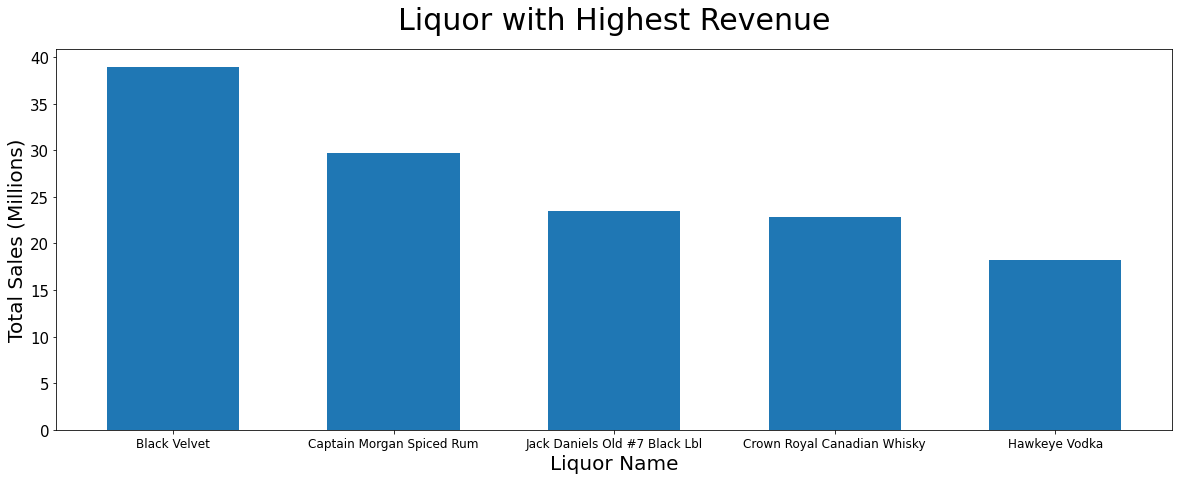

In [44]:
liquorSold2 = liquorSold.sort_values(['Sale (Millions)'], ascending = False)
fig, ax = plt.subplots(figsize=(20,7))
plt.bar(liquorSold2['Item Description'].head(5), liquorSold2['Sale (Millions)'].head(5), width=0.6)
plt.xlabel('Liquor Name', fontsize=20)
plt.ylabel('Total Sales (Millions)', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.title('Liquor with Highest Revenue', fontsize=30, pad=20)
plt.savefig('Images\\LiquorHighRevenue.jpg', dpi=300)
plt.show()

# City with Highest Bottles Sold

In [45]:
citySold = df.groupby(['City', 'Zip Code'])[['Bottle Volume (ml)', 
                                                        'State Bottle Cost', 'State Bottle Retail',
                                                        'Bottles Sold','Sale (Dollars)', 'Volume Sold (Liters)',
                                                        'Volume Sold (Gallons)']].agg('sum').reset_index().sort_values(
    ['Bottles Sold'], ascending = False)

citySold['Bottles Sold (Millions)'] = citySold['Bottles Sold'].div(1000000)
citySold['Sale (Millions)'] = citySold['Sale (Dollars)'].div(1000000)
citySold.drop(columns=['Bottles Sold'], inplace = True)
citySold.drop(columns=['Sale (Dollars)'], inplace = True)

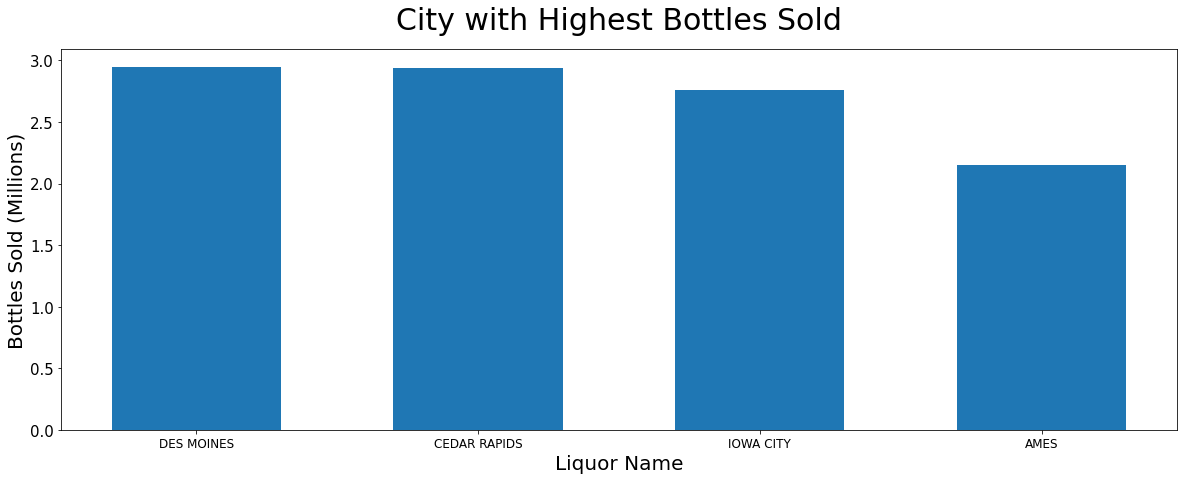

In [54]:
fig, ax = plt.subplots(figsize=(20,7))
plt.bar(citySold['City'].head(5), citySold['Bottles Sold (Millions)'].head(5), width=0.6)
plt.xlabel('Liquor Name', fontsize=20)
plt.ylabel('Bottles Sold (Millions)', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.title('City with Highest Bottles Sold', fontsize=30, pad=20)
plt.savefig('Images\\CityBottleSold.jpg', dpi=300)
plt.show()

In [53]:
citySold

,City,Zip Code,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Volume Sold (Liters),Volume Sold (Gallons),Bottles Sold (Millions),Sale (Millions)
324,DES MOINES,50314,137867370,1862899.98,2797899.93,2451559.23,647774.37,2.942962,42.494221
167,CEDAR RAPIDS,52402,196866707,2063098.35,3100711.23,2703903.98,714353.10,2.934457,37.992518
643,IOWA CITY,52240,198321230,2229682.60,3351246.62,2417222.15,638611.62,2.758205,36.203365
328,DES MOINES,50320,94077369,1169824.54,1757160.01,2600434.24,687023.08,2.748479,42.823361
15,AMES,50010,206063587,2249051.81,3381127.70,2129645.22,562649.35,2.147212,30.042279
...,...,...,...,...,...,...,...,...,...
260,ClearLake,50428.0,17250,119.05,178.61,41.25,10.82,0.000045,0.001008
511,Fonda,50540.0,12000,105.37,158.46,36.24,9.48,0.000028,0.001714
851,Melbourne,50162.0,19450,194.50,291.82,23.29,6.03,0.000025,0.002840
1345,Whittemore,50598,8750,96.26,145.00,8.75,2.25,0.000009,0.001453
